In [157]:
import pandas as pd

In [158]:
df = pd.read_csv("Sales_Data.csv")

In [159]:
df.head()

,Transaction ID,Date,Product Category,Product Name,Quantity Sold,Unit Price,Total Revenue,Region
0,2cac9657-8ec1-4630-aae3-c5509bac12c2,2024-02-12,Electronics,Many,1,372.07,372.07,South
1,05b6b1f0-a0ce-42bc-b1a5-bdc267f46bf0,2024-07-13,Clothing,Rate,5,369.55,1847.75,North
2,d0554257-5cd5-4445-9d54-a309697b7594,2024-04-11,Toys,Modern,14,20.73,290.22,North
3,bb50c0c1-106c-4172-ae74-9f949c0ce005,2024-08-23,Clothing,Job,8,255.15,2041.20,North
4,e30109e2-3933-4f8b-aad0-61a17ac8d1d3,2024-12-11,Toys,Paper,7,359.43,2516.01,West


In [160]:
df.isna().sum()

Transaction ID       0
Date                 0
Product Category     0
Product Name         0
Quantity Sold        0
Unit Price           0
Total Revenue       10
Region               0
dtype: int64

In [161]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity Sold,1005.0,10.751244,5.877722,1.00,6.000,11.00,16.000,20.00
Unit Price,1005.0,245.456498,142.508080,5.08,123.530,241.34,372.070,499.99
Total Revenue,995.0,2595.088382,2208.466327,8.27,756.525,2019.30,3982.255,9981.60


In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    1005 non-null   object 
 1   Date              1005 non-null   object 
 2   Product Category  1005 non-null   object 
 3   Product Name      1005 non-null   object 
 4   Quantity Sold     1005 non-null   int64  
 5   Unit Price        1005 non-null   float64
 6   Total Revenue     995 non-null    float64
 7   Region            1005 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 62.9+ KB


In [163]:
df.columns

Index(['Transaction ID', 'Date', 'Product Category', 'Product Name',
       'Quantity Sold', 'Unit Price', 'Total Revenue', 'Region'],
      dtype='object')

In [164]:
df.shape

(1005, 8)

In [165]:
df.Region.nunique()

4

In [166]:
# Check total number of Unique Product Category and Product Name
k = ['Product Category','Product Name']
for i in k:
    print(i,df[i].nunique())

Product Category 5
Product Name 620


In [167]:
df['Total Revenue'] = df['Total Revenue'].fillna(df['Total Revenue'].mean())

In [168]:
df.isna().sum()

Transaction ID      0
Date                0
Product Category    0
Product Name        0
Quantity Sold       0
Unit Price          0
Total Revenue       0
Region              0
dtype: int64

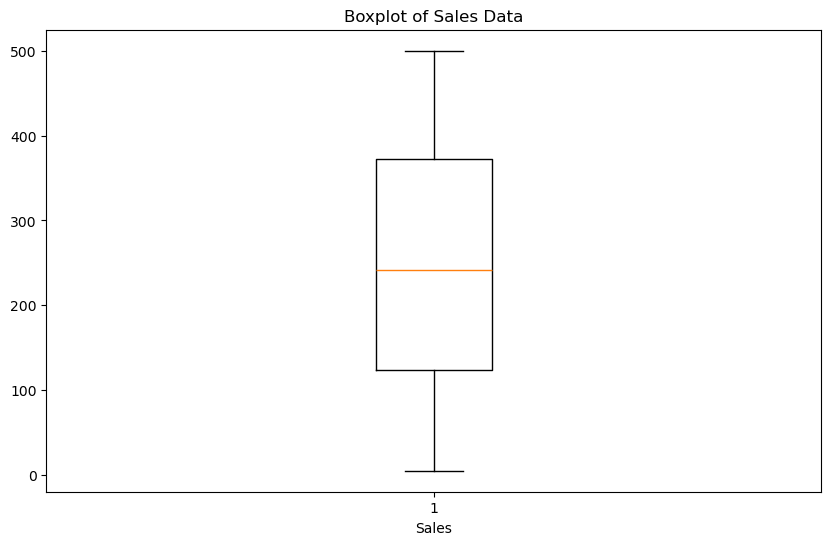

In [170]:
plt.figure(figsize=(10, 6))
plt.boxplot(df['Unit Price'])  # vert=False for horizontal box plot
plt.title('Boxplot of Sales Data')
plt.xlabel('Sales')
plt.show()

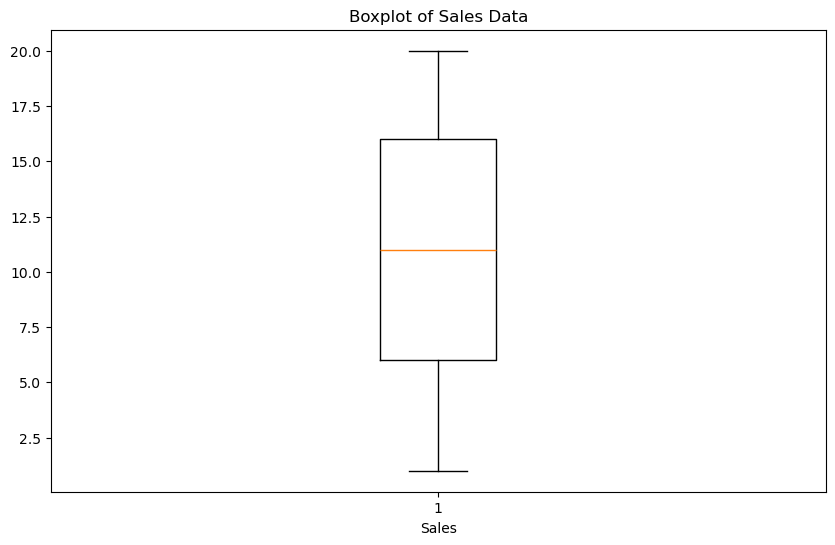

In [70]:
plt.figure(figsize=(10, 6))
plt.boxplot(df['Quantity Sold'])  # vert=False for horizontal box plot
plt.title('Boxplot of Sales Data')
plt.xlabel('Sales')
plt.show()

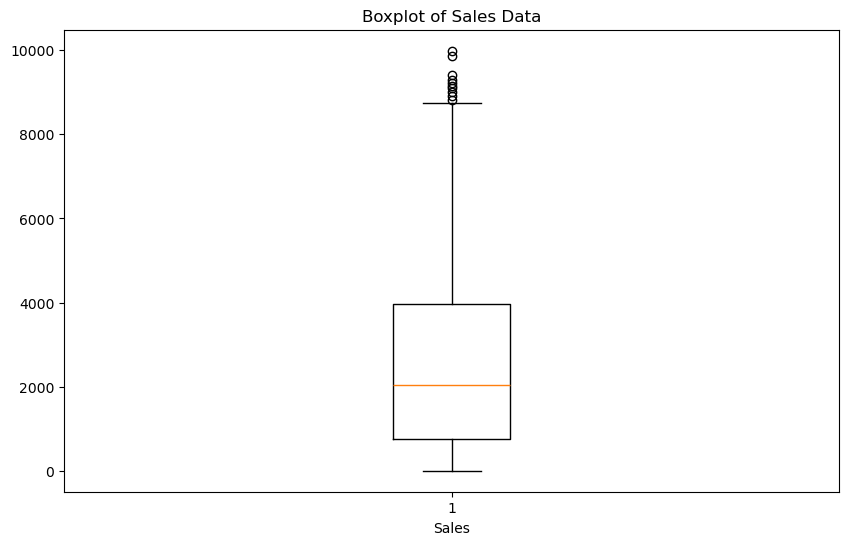

In [171]:
plt.figure(figsize=(10, 6))
plt.boxplot(df['Total Revenue'])  # vert=False for horizontal box plot
plt.title('Boxplot of Sales Data')
plt.xlabel('Sales')
plt.show()

In [72]:
# Calculate IQR
Q1 = df['Total Revenue'].quantile(0.25)
Q3 = df['Total Revenue'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Total Revenue'] < lower_bound) | (df['Total Revenue'] > upper_bound)]
print(outliers)


                                  Transaction ID Product Category  \
Date                                                                
2024-11-25  90e08c00-6e9e-4ddd-81b3-265c4c8f3b8e         Clothing   
2024-09-20  ef9a07f1-6bc6-4810-bd43-3f658a7c3ee2      Electronics   
2024-08-17  9000ce0c-d326-487c-b26f-792db4c6c60f       Home Goods   
2024-11-26  4482a990-a788-4c13-9b09-4d71ebf7464b       Home Goods   
2024-04-13  4bf9f8eb-427b-47e9-8c92-4b5b7d92326c             Toys   
2024-04-20  3467b0d7-0b6a-46e5-961b-8075ee4f4938      Electronics   
2024-07-24  3bdb0c39-393d-4b85-8db0-e7939c48af40         Clothing   
2024-11-13  128934b1-54f5-417e-aac6-44da2eceea5a       Home Goods   
2024-10-08  c78e0db3-25c9-44ba-973e-11698ab7284d       Home Goods   
2024-07-18  9f7ede27-7523-4fa2-82b0-7cc9b620970e            Books   

           Product Name  Quantity Sold  Unit Price  Total Revenue Region  
Date                                                                      
2024-11-25     Everyo

In [73]:
from scipy.stats import zscore

# Calculate Z-scores
df['Z-Score'] = zscore(df['Total Revenue'])

# Identify outliers (Z-score > 3 or Z-score < -3)
outliers_zscore = df[df['Z-Score'].abs() > 3]
print(outliers_zscore)

                                  Transaction ID Product Category  \
Date                                                                
2024-08-17  9000ce0c-d326-487c-b26f-792db4c6c60f       Home Goods   
2024-11-26  4482a990-a788-4c13-9b09-4d71ebf7464b       Home Goods   
2024-04-13  4bf9f8eb-427b-47e9-8c92-4b5b7d92326c             Toys   
2024-11-13  128934b1-54f5-417e-aac6-44da2eceea5a       Home Goods   
2024-10-08  c78e0db3-25c9-44ba-973e-11698ab7284d       Home Goods   

           Product Name  Quantity Sold  Unit Price  Total Revenue Region  \
Date                                                                       
2024-08-17         Ball             19      495.07        9406.33   East   
2024-11-26         Seek             20      499.08        9981.60   East   
2024-04-13   Television             20      460.66        9213.20  North   
2024-11-13        Prove             19      488.78        9286.82  North   
2024-10-08         Keep             20      492.71        98

In [74]:
df['Total Revenue'] = df['Total Revenue'].apply(lambda x: df['Total Revenue'].mean() if x < lower_bound or x > upper_bound else x)

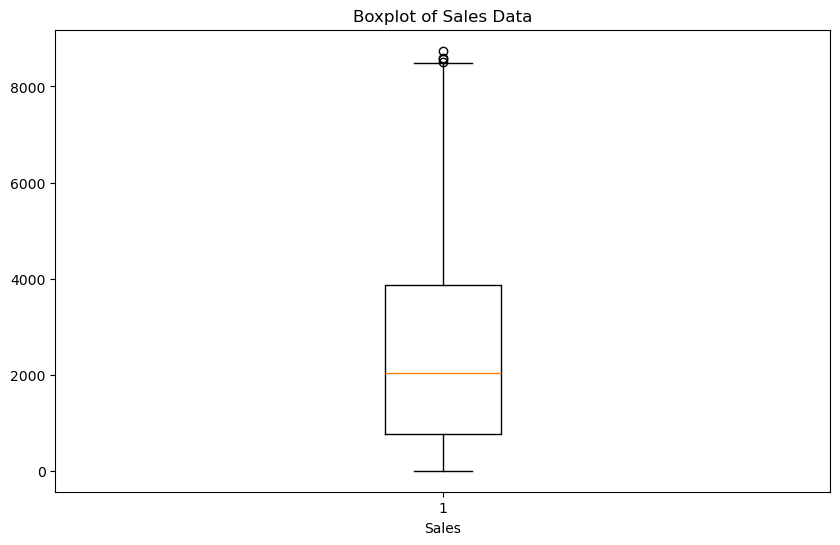

In [75]:
plt.figure(figsize=(10, 6))
plt.boxplot(df['Total Revenue'])  # vert=False for horizontal box plot
plt.title('Boxplot of Sales Data')
plt.xlabel('Sales')
plt.show()

In [76]:
#duplicates = df[df.duplicated(keep=False)]
#print(duplicates)

In [77]:
# Aggregate total sales and quantity by product
aggregated = df.groupby('Product Name').agg({'Quantity Sold': 'sum', 'Total Revenue': 'sum'}).reset_index()
print(aggregated)


    Product Name  Quantity Sold  Total Revenue
0              A             38    8601.280000
1        Ability              3    1011.720000
2          Above             10    2568.900000
3         Accept             13    2595.088382
4      According              6    2517.840000
..           ...            ...            ...
615          Yes             20    8512.400000
616          Yet             19    1882.710000
617          You             10    1412.000000
618        Young             19    2113.310000
619     Yourself              5    1955.350000

[620 rows x 3 columns]


In [78]:
#Identify top 5 best selling products and their total revenue
# Sort by sales
sorted_df = aggregated.sort_values(by=['Quantity Sold','Total Revenue'], ascending=False)
print(sorted_df)

    Product Name  Quantity Sold  Total Revenue
548        Those             69       24023.95
536         Than             67       19696.10
598          Who             63        6732.37
5        Account             62       12912.11
74           But             59       10353.10
..           ...            ...            ...
164   Especially              1         162.75
308       Moment              1         155.42
141     Discover              1         109.84
222         Hard              1          49.36
361      Partner              1          23.67

[620 rows x 3 columns]


In [79]:
#Determine which region generates the highest total revenue and which region has the lowest average revenue per transaciton
aggregated1 = df.groupby('Region').agg({'Total Revenue': 'sum'}).reset_index()
print(aggregated1)

  Region  Total Revenue
0   East  597888.403528
1  North  610952.420291
2  South  692224.535146
3   West  640246.058673


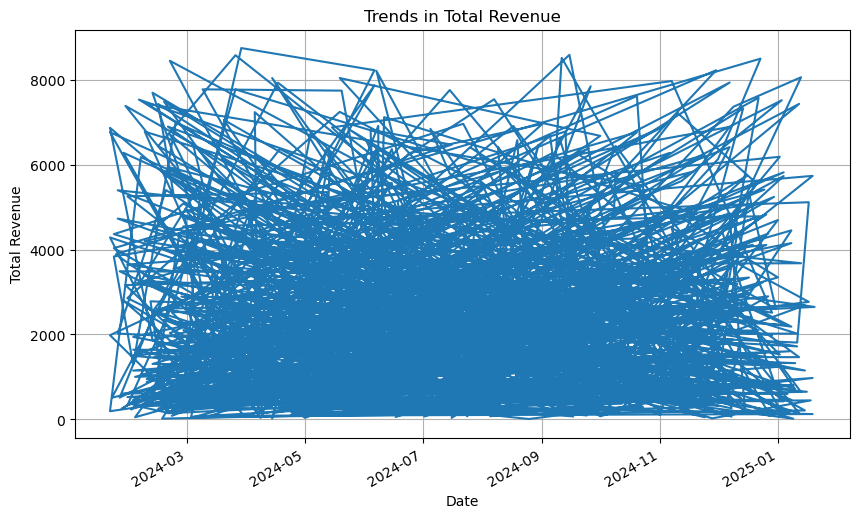

In [80]:
#Plot a time-series chart showing trends in total revenue over time
# Plotting the time series
import matplotlib.pyplot as plt
df['Total Revenue'].plot(figsize=(10, 6), title='Trends in Total Revenue', xlabel='Date', ylabel='Total Revenue')
plt.grid()
plt.show()


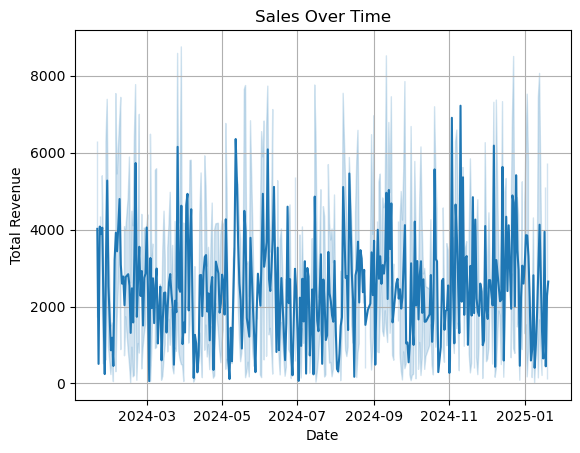

In [81]:
import seaborn as sns

# Plot using Seaborn
sns.lineplot(data=df, x='Date',y='Total Revenue')
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.grid()
plt.show()


<Axes: title={'center': 'Sample plot'}, xlabel='Index', ylabel='Data'>

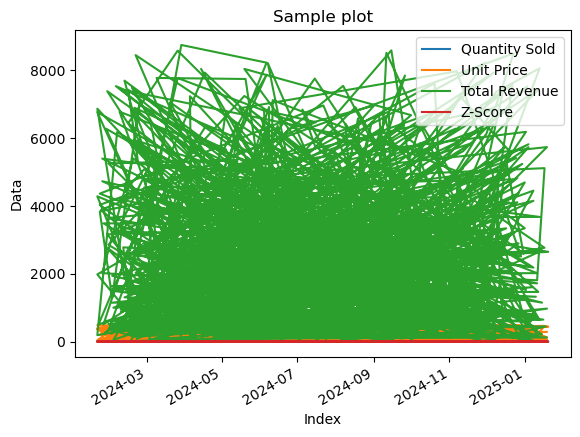

In [82]:
df.plot(title='Sample plot',xlabel='Index',ylabel='Data')

array([[<Axes: title={'center': 'Quantity Sold'}>,
        <Axes: title={'center': 'Unit Price'}>],
       [<Axes: title={'center': 'Total Revenue'}>,
        <Axes: title={'center': 'Z-Score'}>]], dtype=object)

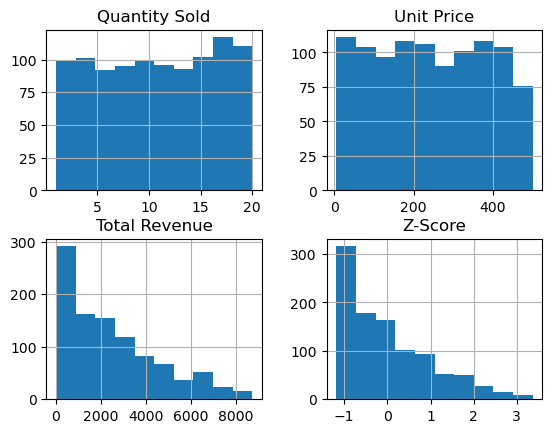

In [83]:
df.hist()

<Axes: ylabel='Frequency'>

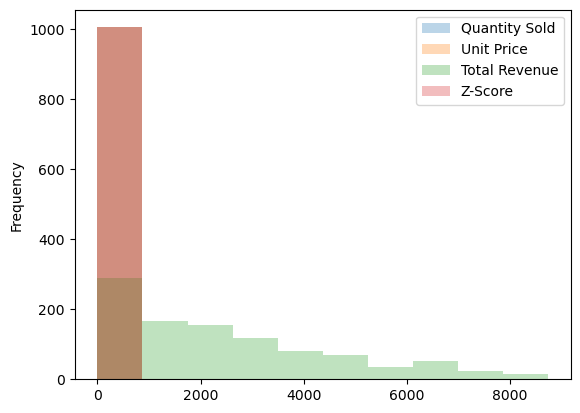

In [84]:
df.plot(kind='hist',alpha=.3)

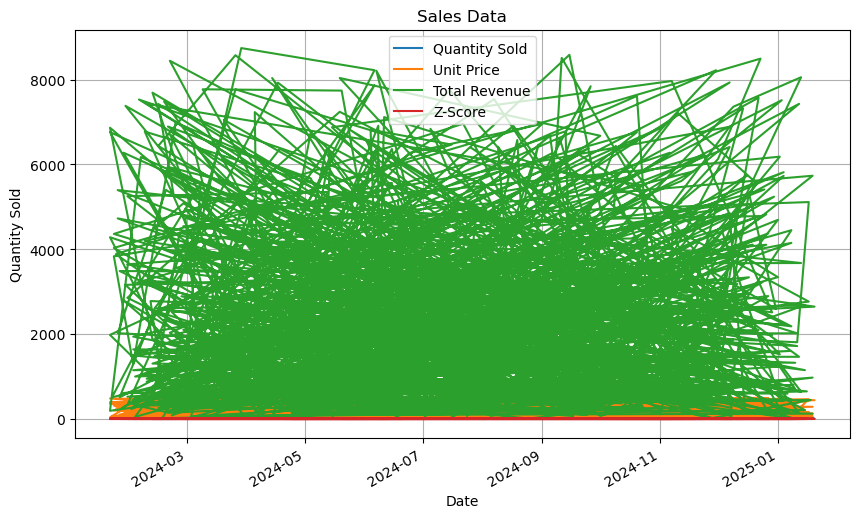

In [87]:
# Plot the time series
df.plot(figsize=(10, 6), title='Sales Data', xlabel='Date', ylabel='Quantity Sold', grid=True)
plt.show()


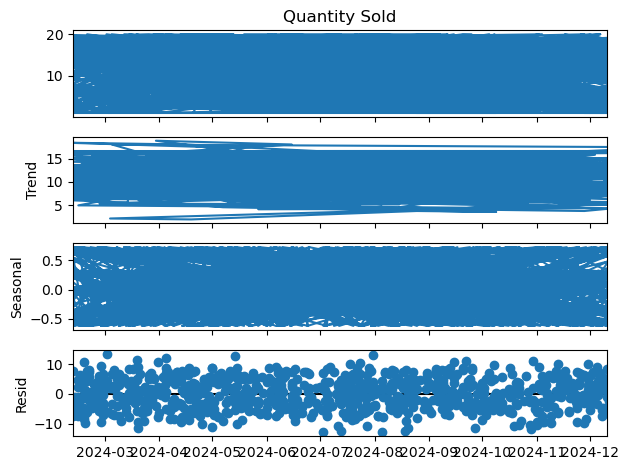

In [88]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
result = seasonal_decompose(df['Quantity Sold'], model='additive', period=5)  # Adjust 'period' based on data frequency

# Plot components
result.plot()
plt.show()


In [104]:
df.columns

Index(['Transaction ID', 'Product Category', 'Product Name', 'Quantity Sold',
       'Unit Price', 'Total Revenue', 'Region', 'Z-Score'],
      dtype='object')

In [94]:
unique_products = df['Product Name'].unique()
unique_products

array(['Many', 'Rate', 'Modern', 'Job', 'Paper', 'Power', 'Exactly',
       'Section', 'Land', 'Expert', 'Catch', 'His', 'Hair', 'Accept',
       'Defense', 'Since', 'Enough', 'Sing', 'Society', 'Learn', 'Past',
       'Although', 'Account', 'Tree', 'Stand', 'Enter', 'Number', 'Order',
       'Speak', 'So', 'Serious', 'College', 'Stuff', 'General',
       'Property', 'Big', 'Assume', 'Main', 'Hundred', 'Edge', 'Become',
       'Nor', 'Medical', 'Against', 'Indicate', 'Hospital', 'Character',
       'Democratic', 'Before', 'Heavy', 'Best', 'Material', 'Collection',
       'Cut', 'Sea', 'Listen', 'A', 'Specific', 'All', 'East', 'Product',
       'Write', 'Idea', 'Yeah', 'Feeling', 'Data', 'Few', 'Young', 'Fine',
       'Significant', 'Long', 'Network', 'Really', 'Throw', 'Least',
       'Expect', 'Owner', 'Matter', 'Forward', 'Mother', 'Soon', 'Age',
       'Any', 'Wait', 'Heart', 'Per', 'Sister', 'Part', 'Where', 'Food',
       'President', 'Everyone', 'Offer', 'Economy', 'Yet', 'Test',

unique_products_cat = df['Product Category'].unique()
unique_products_cat

In [108]:
df.isna().sum()

Transaction ID      0
Product Category    0
Product Name        0
Quantity Sold       0
Unit Price          0
Total Revenue       0
Region              0
Z-Score             0
dtype: int64

Identify Seasonal Trends or Patterns in sales data

In [109]:
df1 = pd.read_csv('Sales_Data.csv')

In [110]:
df1.head()

,Transaction ID,Date,Product Category,Product Name,Quantity Sold,Unit Price,Total Revenue,Region
0,2cac9657-8ec1-4630-aae3-c5509bac12c2,2024-02-12,Electronics,Many,1,372.07,372.07,South
1,05b6b1f0-a0ce-42bc-b1a5-bdc267f46bf0,2024-07-13,Clothing,Rate,5,369.55,1847.75,North
2,d0554257-5cd5-4445-9d54-a309697b7594,2024-04-11,Toys,Modern,14,20.73,290.22,North
3,bb50c0c1-106c-4172-ae74-9f949c0ce005,2024-08-23,Clothing,Job,8,255.15,2041.20,North
4,e30109e2-3933-4f8b-aad0-61a17ac8d1d3,2024-12-11,Toys,Paper,7,359.43,2516.01,West


In [114]:
df1.isna().sum()

Transaction ID       0
Date                 0
Product Category     0
Product Name         0
Quantity Sold        0
Unit Price           0
Total Revenue       10
Region               0
dtype: int64

In [116]:
# Check the data type of the 'Date' column
print(df1['Date'].dtype)

object


In [117]:
# Convert the 'Date' column to datetime
df1['Date'] = pd.to_datetime(df1['Date'], errors='coerce')

# Verify if conversion is successful
print(df1['Date'].dtype)

datetime64[ns]


In [119]:
print(df1['Date'].dtype)

datetime64[ns]


In [120]:
# Extract Year and Month from 'Date'
df1['Year'] = df1['Date'].dt.year
df1['Month'] = df1['Date'].dt.month_name()

# Check the result
print(df1)

                            Transaction ID       Date Product Category  \
0     2cac9657-8ec1-4630-aae3-c5509bac12c2 2024-02-12      Electronics   
1     05b6b1f0-a0ce-42bc-b1a5-bdc267f46bf0 2024-07-13         Clothing   
2     d0554257-5cd5-4445-9d54-a309697b7594 2024-04-11             Toys   
3     bb50c0c1-106c-4172-ae74-9f949c0ce005 2024-08-23         Clothing   
4     e30109e2-3933-4f8b-aad0-61a17ac8d1d3 2024-12-11             Toys   
...                                    ...        ...              ...   
1000  2cac9657-8ec1-4630-aae3-c5509bac12c2 2024-02-12      Electronics   
1001  05b6b1f0-a0ce-42bc-b1a5-bdc267f46bf0 2024-07-13         Clothing   
1002  d0554257-5cd5-4445-9d54-a309697b7594 2024-04-11             Toys   
1003  bb50c0c1-106c-4172-ae74-9f949c0ce005 2024-08-23         Clothing   
1004  e30109e2-3933-4f8b-aad0-61a17ac8d1d3 2024-12-11             Toys   

     Product Name  Quantity Sold  Unit Price  Total Revenue Region  Year  \
0            Many              1   

In [122]:
# Group by Year, Month, and Product name, and get the Total Revenue
product_monthly_sales = df1.groupby(['Year', 'Month', 'Product Name'])['Total Revenue'].sum().reset_index()

print(product_monthly_sales)

     Year    Month Product Name  Total Revenue
0    2024    April      Account        3552.56
1    2024    April       Affect        1456.18
2    2024    April      Already        1831.31
3    2024    April       Animal        3253.40
4    2024    April      Another        5042.18
..    ...      ...          ...            ...
954  2025  January      Teacher        2685.30
955  2025  January        Throw        5817.42
956  2025  January      Trouble         705.98
957  2025  January           Up        5734.20
958  2025  January        Young         124.13

[959 rows x 4 columns]


In [123]:
# Pivot to create a table where columns are months and rows are products
pivot_table = product_monthly_sales.pivot_table(index='Product Name', columns='Month', values='Total Revenue', aggfunc='sum', fill_value=0)

print(pivot_table)

Month           April  August  December  February  January  July  June  March  \
Product Name                                                                    
A                0.00     0.0   8565.75       0.0     0.00   0.0   0.0    0.0   
Ability          0.00     0.0      0.00       0.0     0.00   0.0   0.0    0.0   
Above            0.00  2568.9      0.00       0.0     0.00   0.0   0.0    0.0   
Accept           0.00     0.0      0.00       0.0     0.00   0.0   0.0    0.0   
According        0.00     0.0      0.00       0.0     0.00   0.0   0.0    0.0   
...               ...     ...       ...       ...      ...   ...   ...    ...   
Yes              0.00     0.0      0.00       0.0     0.00   0.0   0.0    0.0   
Yet           1882.71     0.0      0.00       0.0     0.00   0.0   0.0    0.0   
You              0.00     0.0   1412.00       0.0     0.00   0.0   0.0    0.0   
Young            0.00     0.0      0.00       0.0   124.13   0.0   0.0    0.0   
Yourself      1955.35     0.

In [124]:
pivot_table.head(5)

Month,April,August,December,February,January,July,June,March,May,November,October,September
Product Name,,,,,,,,,,,,
A,0.0,0.0,8565.75,0.0,0.0,0.0,0.0,0.0,35.53,0.00,0.00,0.0
Ability,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,1011.72,0.00,0.0
Above,0.0,2568.9,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0
Accept,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0
According,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,2517.84,0.0


<Axes: xlabel='Product Name'>

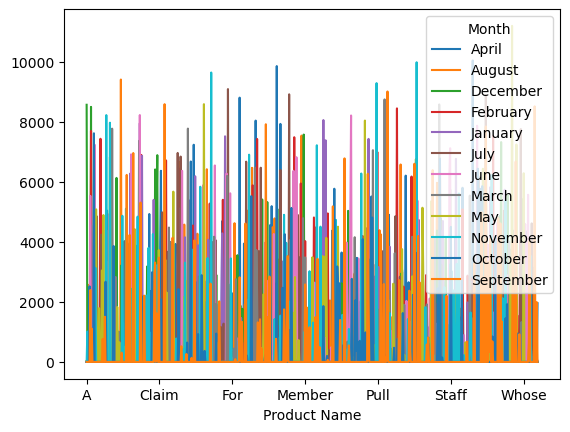

In [125]:
pivot_table.plot()

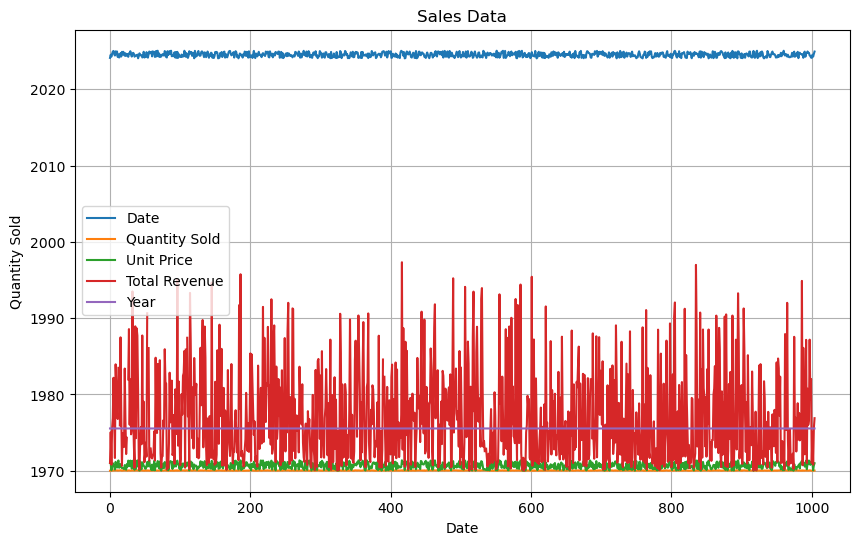

In [126]:
# Plot the time series
df1.plot(figsize=(10, 6), title='Sales Data', xlabel='Date', ylabel='Quantity Sold', grid=True)
plt.show()

In [132]:
# Filter sales data for March 2024
march_sales = df1[df1['Date'].dt.month == 3]  # Filter by month
march_sales = march_sales[march_sales['Date'].dt.year == 2024]  # Filter by year

print(march_sales)


                           Transaction ID       Date Product Category  \
11   6a3d44bf-0c2c-47e4-bcbb-403f791f6794 2024-03-25             Toys   
46   f3be9545-edc3-4afe-8289-325b71cc89d7 2024-03-04         Clothing   
51   b5739c3a-4029-4325-a72c-d394634a5429 2024-03-19         Clothing   
64   c8a3f4e6-2ff9-4472-937f-776fc1e73c75 2024-03-29             Toys   
71   2d2f31e6-c26c-4ef1-a048-f1be550d8fc3 2024-03-24         Clothing   
..                                    ...        ...              ...   
940  06907018-8e37-4ada-b3dc-f0eb95bdb8f4 2024-03-30       Home Goods   
941  c2c75417-1a38-474b-ad44-6552b94df392 2024-03-19         Clothing   
951  49729443-d362-4c49-959c-75ff3b69ce2a 2024-03-09      Electronics   
968  3702e962-0a7a-4d14-b198-adb7167f3816 2024-03-13       Home Goods   
970  b85e618e-efc6-47c2-9ace-1f95111c9abf 2024-03-18            Books   

    Product Name  Quantity Sold  Unit Price  Total Revenue Region  Year  Month  
11           His              7      353.7

In [133]:
# Group by product and sum sales for March 2023
march_sales_summary = march_sales.groupby('Product Name')['Total Revenue'].sum().reset_index()

print(march_sales_summary)

   Product Name  Total Revenue
0           Ago         928.29
1         Agree         871.89
2          Also        2216.40
3       Article        7769.67
4            As        1531.97
..          ...            ...
78         Walk        4380.30
79        White        1328.88
80        Woman        2329.51
81        Write         493.40
82         Year         375.06

[83 rows x 2 columns]


In [135]:
march_sales_summary

,Product Name,Total Revenue
0,Ago,928.29
1,Agree,871.89
2,Also,2216.40
3,Article,7769.67
4,As,1531.97
...,...,...
78,Walk,4380.30
79,White,1328.88
80,Woman,2329.51
81,Write,493.40


In [136]:
# Group by Year and Month, then sum the Total Revenue (revenue)
monthly_revenue = df1.groupby(['Year', 'Month'])['Total Revenue'].sum().reset_index()

# Display the results
print(monthly_revenue)

    Year      Month  Total Revenue
0   2024      April      230380.41
1   2024     August      188731.30
2   2024   December      223974.40
3   2024   February      254615.17
4   2024    January       85927.51
5   2024       July      230847.44
6   2024       June      219121.01
7   2024      March      206864.46
8   2024        May      194902.73
9   2024   November      213862.72
10  2024    October      184671.22
11  2024  September      242140.83
12  2025    January      106073.74


In [137]:
# Sorting the months in chronological order
month_order = ['January', 'February', 'March', 'April', 'May','June','July','August','September','October','November','December']
monthly_revenue['Month'] = pd.Categorical(monthly_revenue['Month'], categories=month_order, ordered=True)

# Sort by Year and Month
monthly_revenue = monthly_revenue.sort_values(['Year', 'Month'])

# Display the sorted result
print(monthly_revenue)

    Year      Month  Total Revenue
4   2024    January       85927.51
3   2024   February      254615.17
7   2024      March      206864.46
0   2024      April      230380.41
8   2024        May      194902.73
6   2024       June      219121.01
5   2024       July      230847.44
1   2024     August      188731.30
11  2024  September      242140.83
10  2024    October      184671.22
9   2024   November      213862.72
2   2024   December      223974.40
12  2025    January      106073.74


In [141]:
# Convert the 'Month' column to string
monthly_revenue['Month'] = monthly_revenue['Month'].astype(str)

# Concatenate 'Month' and 'Year' for the x-axis labels
monthly_revenue['Month_Year'] = monthly_revenue['Month'] + ' ' + monthly_revenue['Year'].astype(str)

# Check the result
print(monthly_revenue)

    Year      Month  Total Revenue      Month_Year
4   2024    January       85927.51    January 2024
3   2024   February      254615.17   February 2024
7   2024      March      206864.46      March 2024
0   2024      April      230380.41      April 2024
8   2024        May      194902.73        May 2024
6   2024       June      219121.01       June 2024
5   2024       July      230847.44       July 2024
1   2024     August      188731.30     August 2024
11  2024  September      242140.83  September 2024
10  2024    October      184671.22    October 2024
9   2024   November      213862.72   November 2024
2   2024   December      223974.40   December 2024
12  2025    January      106073.74    January 2025


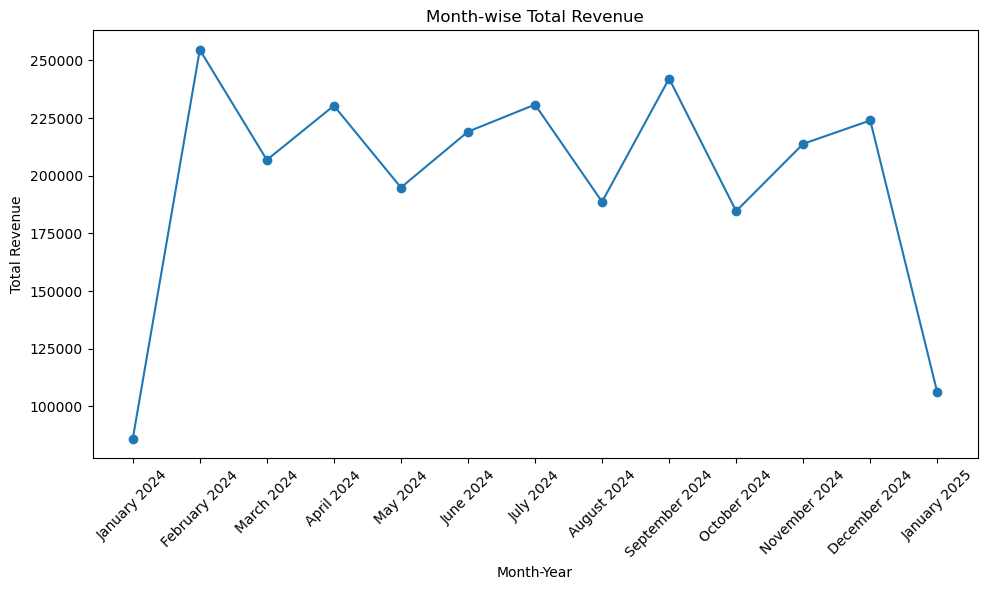

<Figure size 640x480 with 0 Axes>

In [156]:
# Plotting the month-wise total revenue with 'Month_Year' as the x-axis
plt.figure(figsize=(10, 6))
plt.plot(monthly_revenue['Month_Year'], monthly_revenue['Total Revenue'], marker='o')

plt.xlabel('Month-Year')
plt.ylabel('Total Revenue')
plt.title('Month-wise Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()
plt.savefig('line_chart.pdf')

In [144]:
#Now we will fetch which product is sold in the month of january
# Extract Year and Month from 'Sales_Date'
df1['Year'] = df1['Date'].dt.year
df1['Month'] = df1['Date'].dt.month_name()

# Check the DataFrame
print(df1)

                            Transaction ID       Date Product Category  \
0     2cac9657-8ec1-4630-aae3-c5509bac12c2 2024-02-12      Electronics   
1     05b6b1f0-a0ce-42bc-b1a5-bdc267f46bf0 2024-07-13         Clothing   
2     d0554257-5cd5-4445-9d54-a309697b7594 2024-04-11             Toys   
3     bb50c0c1-106c-4172-ae74-9f949c0ce005 2024-08-23         Clothing   
4     e30109e2-3933-4f8b-aad0-61a17ac8d1d3 2024-12-11             Toys   
...                                    ...        ...              ...   
1000  2cac9657-8ec1-4630-aae3-c5509bac12c2 2024-02-12      Electronics   
1001  05b6b1f0-a0ce-42bc-b1a5-bdc267f46bf0 2024-07-13         Clothing   
1002  d0554257-5cd5-4445-9d54-a309697b7594 2024-04-11             Toys   
1003  bb50c0c1-106c-4172-ae74-9f949c0ce005 2024-08-23         Clothing   
1004  e30109e2-3933-4f8b-aad0-61a17ac8d1d3 2024-12-11             Toys   

     Product Name  Quantity Sold  Unit Price  Total Revenue Region  Year  \
0            Many              1   

In [148]:
# Filter sales data for January 2024
January_sales = df1[(df1['Month'] == 'January') & (df1['Year'] == 2024)]

# Fetch unique products sold in  January 2024
January_products =  January_sales['Product Name'].unique()

# Display the result
print( January_products)

['Edge' 'Dinner' 'Receive' 'Account' 'Charge' 'Beyond' 'Consider'
 'Professional' 'Story' 'Pick' 'Purpose' 'Shake' 'Why' 'Support' 'Eye'
 'Sometimes' 'Between' 'By' 'Trip' 'Stock' 'Evening' 'News' 'Send' 'Than'
 'Or' 'Few']


In [149]:
# Group by Product and count occurrences in January 2024
January_product_sales = January_sales.groupby('Product Name').size().reset_index(name='Sales_Count')

# Display the result
print(January_product_sales)

    Product Name  Sales_Count
0        Account            1
1        Between            1
2         Beyond            1
3             By            1
4         Charge            1
5       Consider            1
6         Dinner            1
7           Edge            1
8        Evening            1
9            Eye            1
10           Few            1
11          News            1
12            Or            1
13          Pick            1
14  Professional            1
15       Purpose            1
16       Receive            1
17          Send            1
18         Shake            1
19     Sometimes            1
20         Stock            1
21         Story            1
22       Support            1
23          Than            1
24          Trip            1
25           Why            1


In [150]:
# Sort products by sales count in descending order
January_product_sales_sorted = January_product_sales.sort_values(by='Sales_Count', ascending=False)

# Display the sorted result
print(January_product_sales_sorted)

    Product Name  Sales_Count
0        Account            1
1        Between            1
24          Trip            1
23          Than            1
22       Support            1
21         Story            1
20         Stock            1
19     Sometimes            1
18         Shake            1
17          Send            1
16       Receive            1
15       Purpose            1
14  Professional            1
13          Pick            1
12            Or            1
11          News            1
10           Few            1
9            Eye            1
8        Evening            1
7           Edge            1
6         Dinner            1
5       Consider            1
4         Charge            1
3             By            1
2         Beyond            1
25           Why            1


In [153]:
# Now we will see for February 
# Filter sales data for February  2024
February_sales = df1[(df1['Month'] == 'February') & (df1['Year'] == 2024)]

# Fetch unique products sold in  January 2024
February_products =  February_sales['Product Name'].unique()

# Display the result
print( February_products)

['Many' 'Accept' 'Before' 'Collection' 'Where' 'President' 'Offer' 'Ready'
 'Theory' 'Who' 'Decade' 'Prepare' 'Public' 'Share' 'Cost' 'View' 'Move'
 'Politics' 'Television' 'Executive' 'Mouth' 'Street' 'As' 'Shake' 'Real'
 'Member' 'Walk' 'Thought' 'Such' 'Political' 'Almost' 'Very' 'Somebody'
 'Top' 'Remain' 'Movie' 'Style' 'Nation' 'Score' 'Establish' 'Team'
 'Recently' 'Field' 'Challenge' 'Show' 'Dream' 'Grow' 'Customer' 'Nor'
 'Surface' 'Data' 'Buy' 'Sea' 'Represent' 'Sometimes' 'Something' 'Rise'
 'Weight' 'Term' 'Blood' 'Hard' 'Keep' 'Western' 'Community' 'Leave'
 'Market' 'Begin' 'Cell' 'Simply' 'They' 'Reveal' 'Eight' 'Add' 'Rock'
 'Have' 'Not' 'Order' 'News' 'Blue' 'Bag' 'Protect' 'Including' 'Matter'
 'House' 'Every' 'Lot' 'Make' 'Support' 'Join' 'Hospital' 'Toward' 'Risk'
 'Continue' 'Final' 'Save' 'Herself' 'Off']


In [154]:
# Group by Product and count occurrences in February 2024
February_product_sales = February_sales.groupby('Product Name').size().reset_index(name='Sales_Count')

# Display the result
print(February_product_sales)

   Product Name  Sales_Count
0        Accept            1
1           Add            1
2        Almost            1
3            As            1
4           Bag            1
..          ...          ...
92         Walk            1
93       Weight            1
94      Western            1
95        Where            2
96          Who            2

[97 rows x 2 columns]


In [155]:
# Sort products by sales count in descending order
February_product_sales_sorted = February_product_sales.sort_values(by='Sales_Count', ascending=False)

# Display the sorted result
print(February_product_sales_sorted)

   Product Name  Sales_Count
96          Who            2
95        Where            2
41       Member            2
12   Collection            2
38         Many            2
..          ...          ...
30     Hospital            1
29      Herself            1
28         Have            1
27         Hard            1
48          Not            1

[97 rows x 2 columns]
